In [626]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
import seaborn as sns;
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#Imports ^

In [627]:
CSV = pd.read_csv(r'/Users/callumapps/Downloads/Pokemon.csv')
CSV.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [628]:
CSV.shape
#Determines how many rows and columns in the dataset

(800, 13)

In [629]:
CSV.isnull().sum()
#Dsiplays null values

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [630]:
CSV = CSV.dropna()
#Removes null values
CSV.shape

(414, 13)

In [631]:
CSV.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [632]:
Pokemon = CSV.shape[0]
n_features = CSV.shape[1]
FP = len(CSV[(CSV['Speed'] > 60)])
FP

242

In [633]:
FPRatio = (float(FP)/(Pokemon)) * 100
FPRatio = "{:.2f}".format(FPRatio)
print("Total Number of Pokemon: ", Pokemon)
print("Total Number of Stats: ", n_features)
print("Total Number of Fast Pokemon: ", FP)
print("Ratio Fast to slow: ", FPRatio)

Total Number of Pokemon:  414
Total Number of Stats:  13
Total Number of Fast Pokemon:  242
Ratio Fast to slow:  58.45


In [634]:
CSV.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,376.565217,456.628019,70.649758,83.173913,79.676329,77.048309,75.565217,70.514493,3.410628
std,212.840297,120.849502,22.896557,33.698473,32.593788,33.805061,27.949961,28.521408,1.663010
min,1.000000,190.000000,1.000000,10.000000,15.000000,10.000000,20.000000,5.000000,1.000000
25%,205.500000,355.000000,55.000000,59.250000,55.000000,50.000000,55.000000,50.000000,2.000000
50%,378.000000,475.000000,70.000000,80.000000,75.500000,70.000000,75.000000,70.000000,3.000000
75%,560.750000,529.500000,85.000000,103.000000,100.000000,100.000000,94.750000,91.000000,5.000000
max,721.000000,780.000000,150.000000,190.000000,230.000000,180.000000,230.000000,160.000000,6.000000


In [635]:
CSV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           414 non-null    int64 
 1   Name        414 non-null    object
 2   Type 1      414 non-null    object
 3   Type 2      414 non-null    object
 4   Total       414 non-null    int64 
 5   HP          414 non-null    int64 
 6   Attack      414 non-null    int64 
 7   Defense     414 non-null    int64 
 8   Sp. Atk     414 non-null    int64 
 9   Sp. Def     414 non-null    int64 
 10  Speed       414 non-null    int64 
 11  Generation  414 non-null    int64 
 12  Legendary   414 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 42.5+ KB


In [636]:
#Fields: Type 1 Type 2 Legendary
print("First Type: \n", CSV['Type 1'].describe(),"\n\n", CSV['Type 1'].value_counts(), "\n")
print("Second Type: \n", CSV['Type 2'].describe(),"\n\n", CSV['Type 2'].value_counts(), "\n")
print("Legendary Count: \n", CSV['Legendary'].describe(),"\n\n", CSV['Legendary'].value_counts(), "\n")
print("Generation: \n", CSV['Generation'].describe(),"\n\n", CSV['Generation'].value_counts(), "\n")

First Type: 
 count       414
unique       18
top       Water
freq         53
Name: Type 1, dtype: object 

 Water       53
Bug         52
Grass       37
Normal      37
Rock        35
Fire        24
Steel       22
Ghost       22
Dragon      21
Dark        21
Ground      19
Psychic     19
Electric    17
Poison      13
Ice         11
Fighting     7
Fairy        2
Flying       2
Name: Type 1, dtype: int64 

Second Type: 
 count        414
unique        18
top       Flying
freq          97
Name: Type 2, dtype: object 

 Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64 

Legendary Count: 
 count       414
unique        2
top       False
freq        374
Name: Legendary, dtype: object 

 False    374
True      40
Name: Legendary, dtype: int64 

Gene

In [637]:
#Visualisation: Which Main and sub type has the most pokemon
CSV['Type 1'].value_counts()

Water       53
Bug         52
Grass       37
Normal      37
Rock        35
Fire        24
Steel       22
Ghost       22
Dragon      21
Dark        21
Ground      19
Psychic     19
Electric    17
Poison      13
Ice         11
Fighting     7
Fairy        2
Flying       2
Name: Type 1, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Flying'),
  Text(1, 0, 'Ground'),
  Text(2, 0, 'Poison'),
  Text(3, 0, 'Psychic'),
  Text(4, 0, 'Fighting'),
  Text(5, 0, 'Grass'),
  Text(6, 0, 'Fairy'),
  Text(7, 0, 'Steel'),
  Text(8, 0, 'Dark'),
  Text(9, 0, 'Dragon'),
  Text(10, 0, 'Water'),
  Text(11, 0, 'Ghost'),
  Text(12, 0, 'Ice'),
  Text(13, 0, 'Rock'),
  Text(14, 0, 'Fire'),
  Text(15, 0, 'Electric'),
  Text(16, 0, 'Normal'),
  Text(17, 0, 'Bug')])

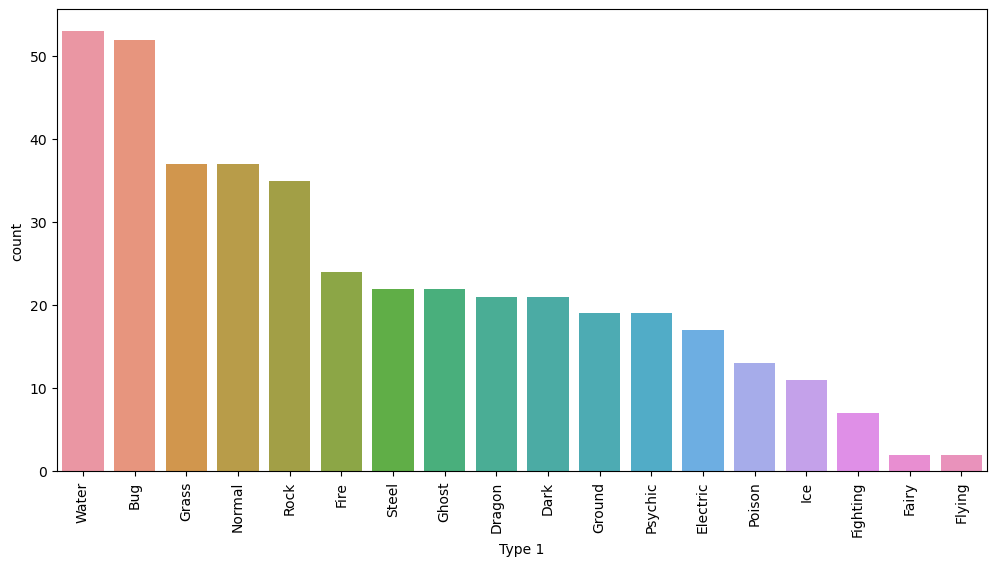

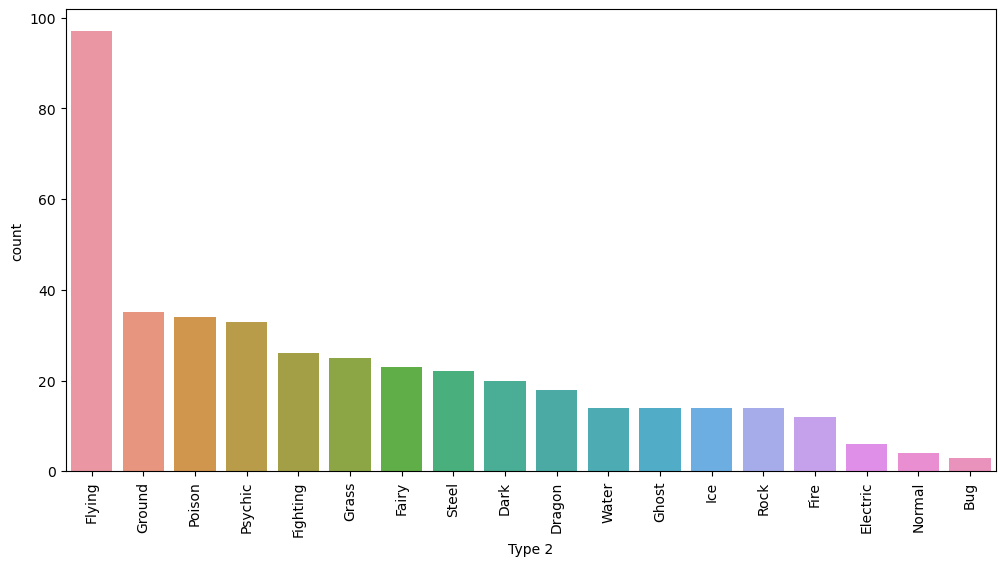

In [638]:
#Visualisation 1 Most Popular type per Gen

plt.figure(figsize=(12,6))
sns.countplot(x="Type 1", data=CSV, order = CSV['Type 1'].value_counts().index)
plt.xticks(rotation=90)

plt.figure(figsize=(12,6))
sns.countplot(x="Type 2", data=CSV, order = CSV['Type 2'].value_counts().index)
plt.xticks(rotation=90)

In [639]:
#Visualisation: Which Generation has the most pokemon
CSV['Generation'].value_counts()

3    82
5    82
1    78
4    67
2    55
6    50
Name: Generation, dtype: int64

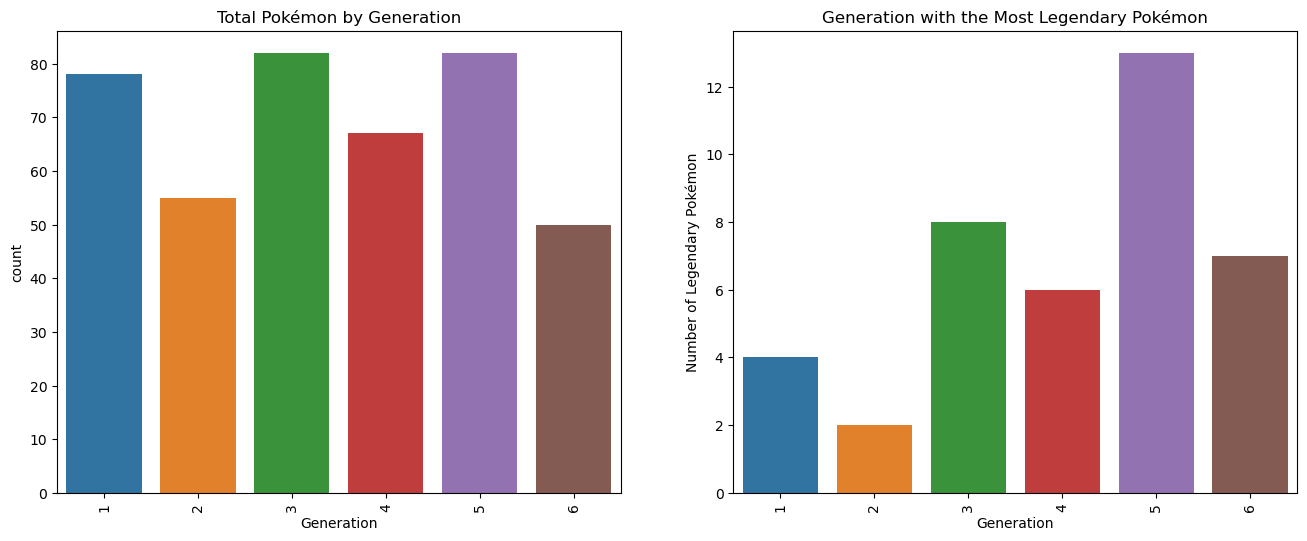

In [640]:
# Visualisation 2 Determining the amount of pokemon and legendary in each generation

# Count the total number of Pokémon in each generation and in ascending order
total_counts = CSV['Generation'].value_counts().reset_index()
total_counts.columns = ['Generation', 'Total']
total_counts = total_counts.sort_values(by='Generation')

# Group the data by "Generation" and count the number of legendary Pokémon in each generation
legendary_counts = CSV.groupby('Generation')['Legendary'].sum().reset_index()

plt.figure(figsize=(16, 6))

# Plot 1: Count Plot
plt.subplot(1, 2, 1)
sns.countplot(x="Generation", data=CSV, order=total_counts['Generation'])
plt.title("Total Pokémon by Generation")
plt.xticks(rotation=90)

# Plot 2: Bar Plot for Legendary Pokémon
plt.subplot(1, 2, 2)
sns.barplot(x="Generation", y="Legendary", data=legendary_counts)
plt.title("Generation with the Most Legendary Pokémon")
plt.xticks(rotation=90)

# Labels
plt.xlabel("Generation")
plt.ylabel("Number of Legendary Pokémon")

plt.show()

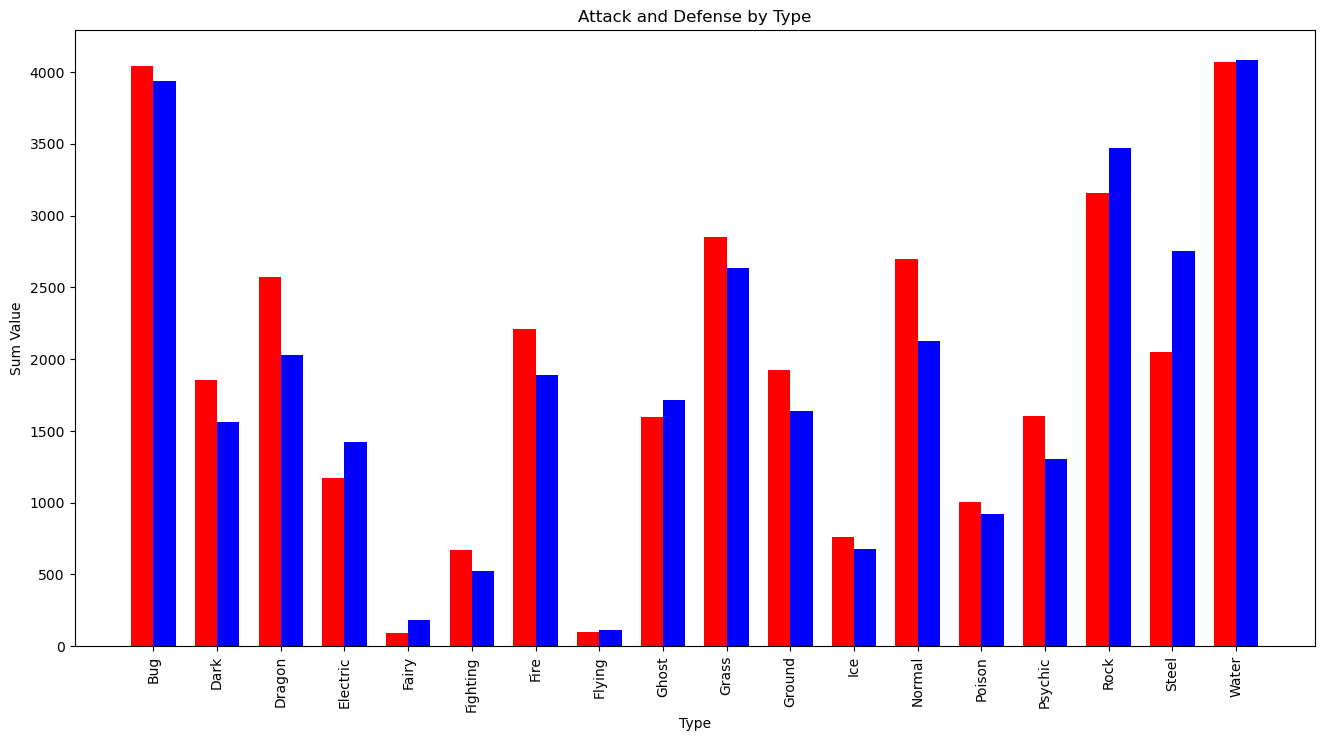

In [641]:
#Visualisation 3 Sum of attack and defence per type

# Calculate the sum of Attack and Defense for each Type 1
ATK_DEF = CSV.groupby(by=['Type 1'])[['Attack', 'Defense']].sum().reset_index()

# Set the figure size
plt.figure(figsize=(16, 8))

type_1_values = ATK_DEF['Type 1'].unique()
x = np.arange(len(type_1_values))
bar_width = 0.35

# Create bars for Attack and defence
plt.bar(x - bar_width/2, ATK_DEF['Attack'], bar_width, label='Attack', color='red')
plt.bar(x + bar_width/2, ATK_DEF['Defense'], bar_width, label='Defense', color='blue')

# labels and customisation
plt.xlabel('Type')
plt.ylabel('Sum Value')
plt.title('Attack and Defense by Type')
plt.xticks(x, type_1_values, rotation=90)

# Show the plot
plt.show()

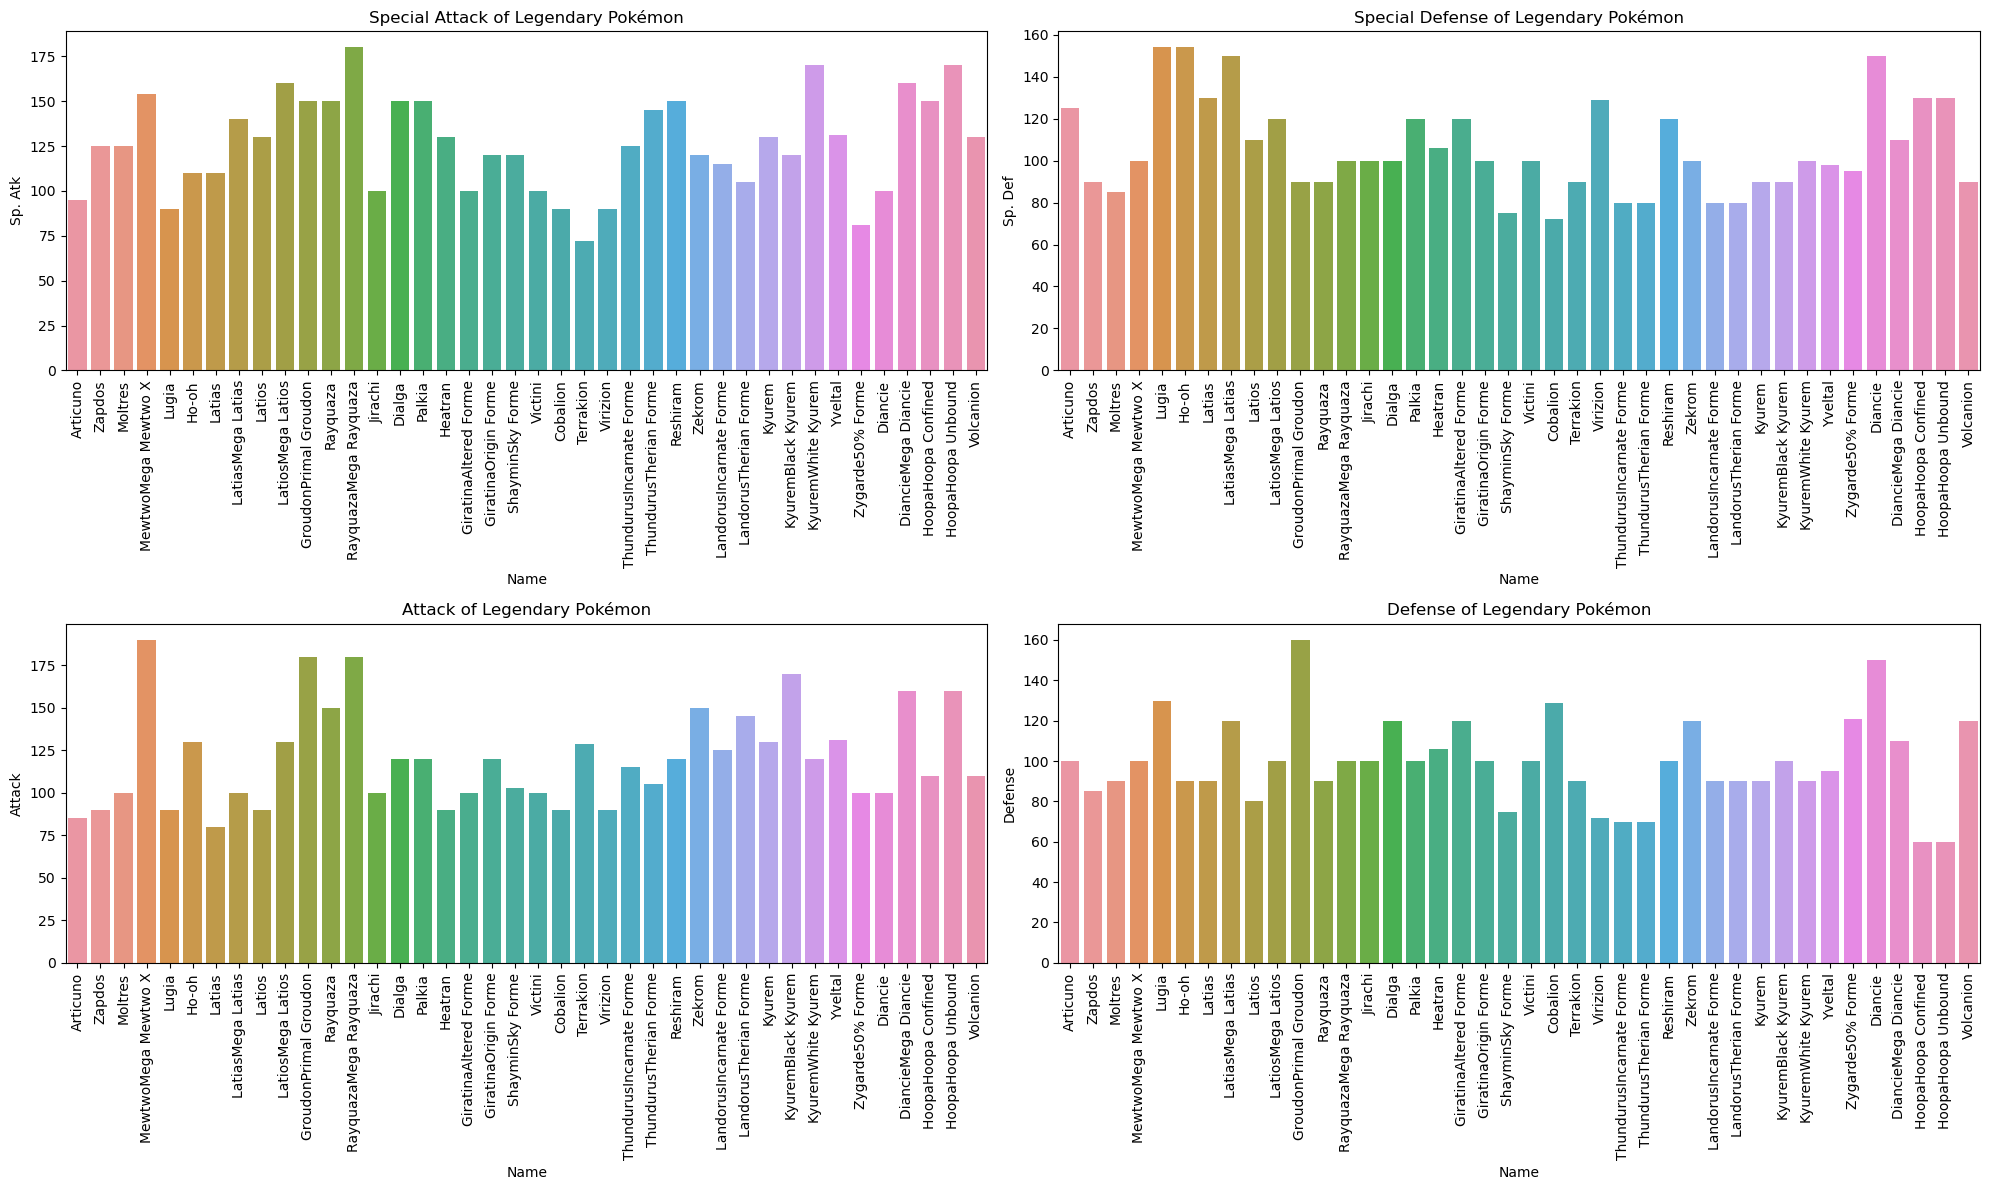

In [642]:
#Visualisation 4 Legendaries with Sp. Atk and Sp. Def above 80

# Filter the data for legendary Pokémon with Sp. Atk or Sp. Def or Attack or Defense above 80
legendary_filtered = CSV[(CSV['Legendary'] == True) & (
    (CSV['Sp. Atk'] > 80) | (CSV['Sp. Def'] > 80) | (CSV['Attack'] > 80) | (CSV['Defense'] > 80)
)]

# Set the figure size
plt.figure(figsize=(20, 12))

# Special Attack of Legendary Pokémon
plt.subplot(2, 2, 1)
sns.barplot(x="Name", y="Sp. Atk", data=legendary_filtered)
plt.title("Special Attack of Legendary Pokémon")
plt.xticks(rotation=90)

# Special Defense of Legendary Pokémon
plt.subplot(2, 2, 2)
sns.barplot(x="Name", y="Sp. Def", data=legendary_filtered)
plt.title("Special Defense of Legendary Pokémon")
plt.xticks(rotation=90)

# Attack of Legendary Pokémon
plt.subplot(2, 2, 3)
sns.barplot(x="Name", y="Attack", data=legendary_filtered)
plt.title("Attack of Legendary Pokémon")
plt.xticks(rotation=90)

# Defense of Legendary Pokémon
plt.subplot(2, 2, 4)
sns.barplot(x="Name", y="Defense", data=legendary_filtered)
plt.title("Defense of Legendary Pokémon")
plt.xticks(rotation=90)

# Show
plt.tight_layout()
plt.show()

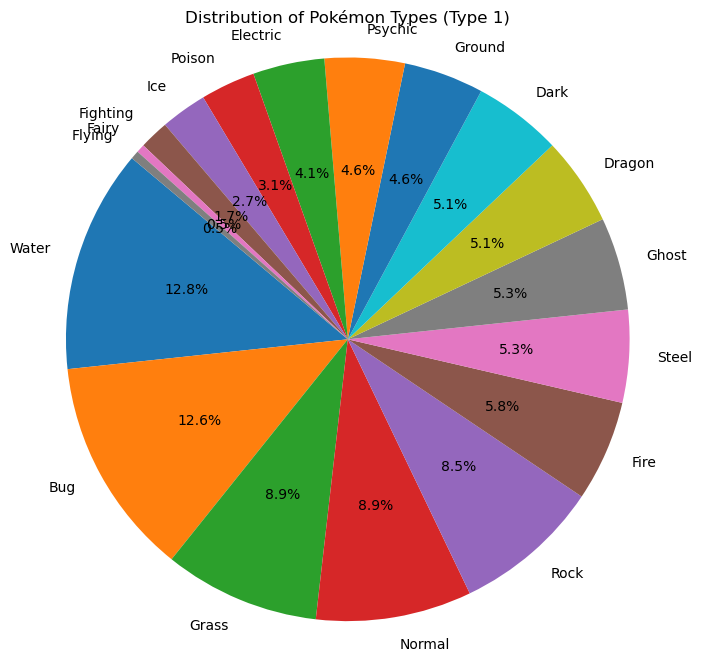

In [643]:
#Visualisaiton 5 Distribution of pokemon types

# Calculate the distribution of different Pokémon types
type_distribution = CSV['Type 1'].value_counts()

# Set up the pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_distribution, labels=type_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Pokémon Types (Type 1)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

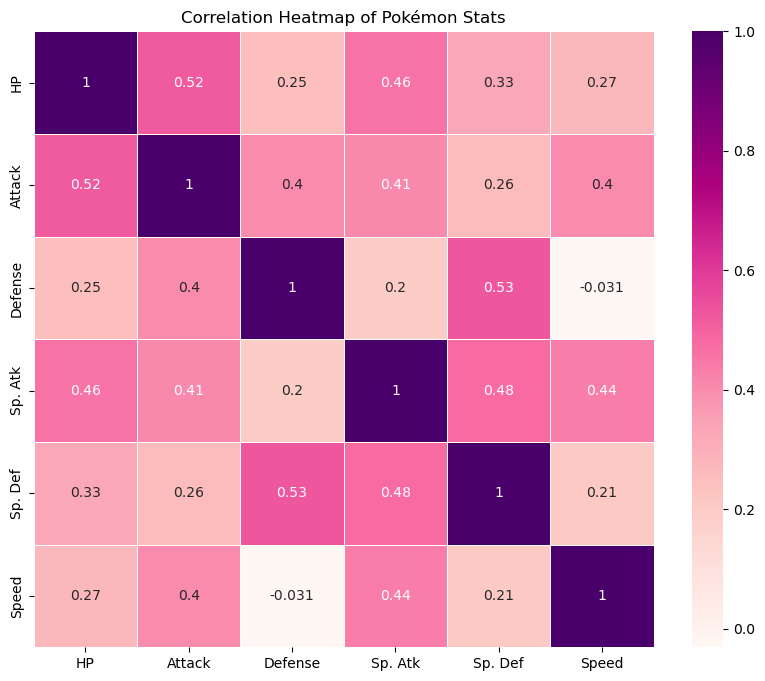

In [644]:
#Visualisation 6 Heatmap of Pokemon Stats

# Calculate the correlation matrix
correlation_matrix = CSV[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr()

# Set up the heatmap with pink and purple colors
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', linewidths=0.5)

plt.title('Correlation Heatmap of Pokémon Stats')
plt.show()

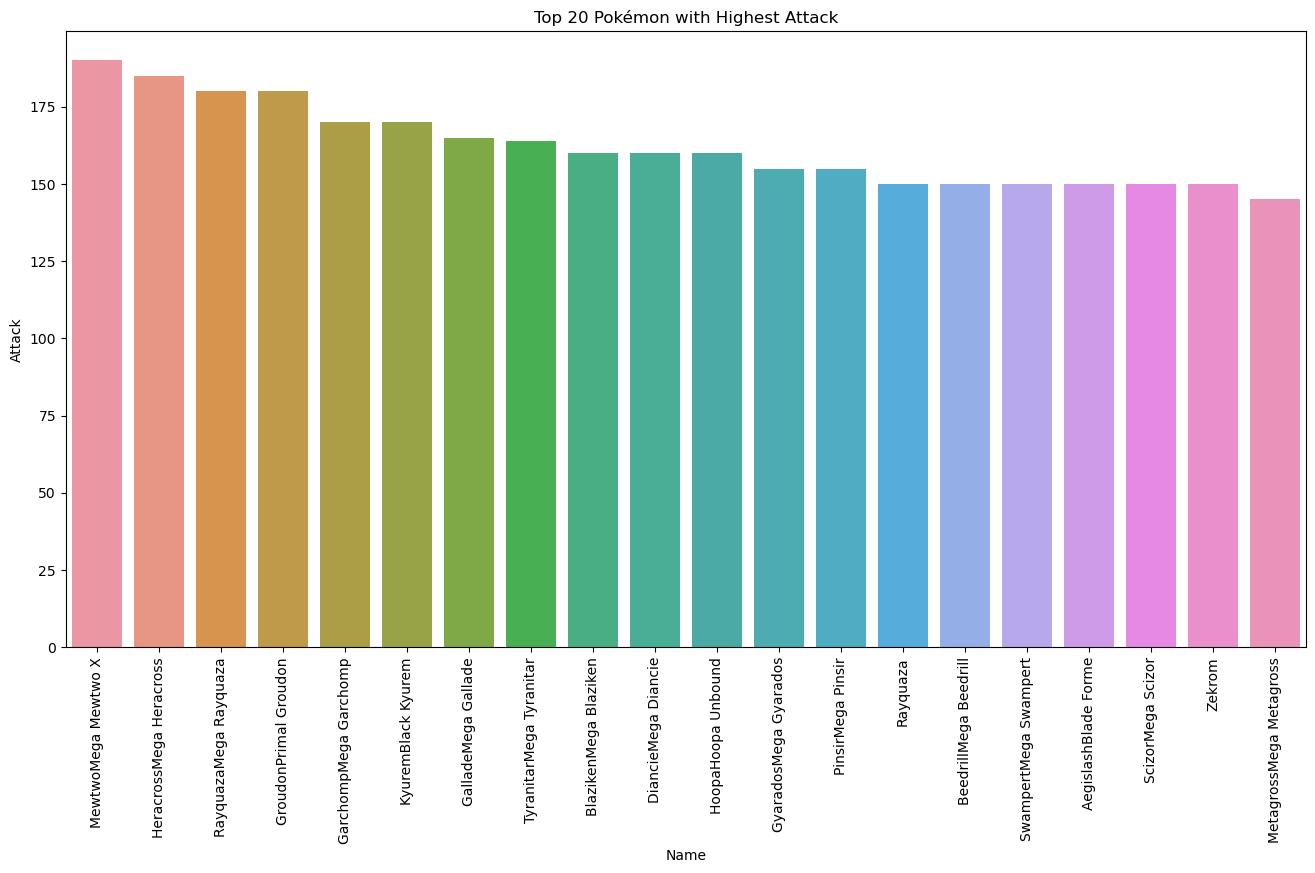

In [645]:
# extra, Top 20 Pokemon with highest attack

# Sort the data by Attack in descending order and select the top 20 Pokémon
top_attack_pokemon = CSV.sort_values(by='Attack', ascending=False).head(20)

# Set the figure size
plt.figure(figsize=(16, 8))

# Create a barplot for the top 20 Pokémon with the highest Attack
sns.barplot(x="Name", y="Attack", data=top_attack_pokemon)
plt.title("Top 20 Pokémon with Highest Attack")
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [646]:
# Define the statistics you want to consider
stats = ['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

# Create a DataFrame 'PokeCompare' with selected columns
PokeCompare = CSV[['Name', 'Type 1', 'Type 2'] + stats]

# Calculate the total stats for each Pokémon
PokeCompare['Total'] = PokeCompare[stats].sum(axis=1)

# Sort the DataFrame by the total stats in descending order
PokeCompare = PokeCompare.sort_values(by='Total', ascending=False)

/var/folders/sk/jyj2ms896535zgxlp5bxhhn80000gp/T/ipykernel_2132/1130008590.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PokeCompare['Total'] = PokeCompare[stats].sum(axis=1)


In [647]:
# Select the top 20 Pokémon
top_20_pokemon = PokeCompare.head(20)

# Display the top 20 Pokémon
top_20_pokemon

,Name,Type 1,Type 2,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total
426,RayquazaMega Rayquaza,Dragon,Flying,180,100,180,100,115,3,678
163,MewtwoMega Mewtwo X,Psychic,Fighting,190,100,154,100,130,1,675
424,GroudonPrimal Groudon,Ground,Fire,180,160,150,90,90,3,673
796,DiancieMega Diancie,Rock,Fairy,160,110,160,110,110,6,656
413,MetagrossMega Metagross,Steel,Psychic,145,150,105,110,110,3,623
418,LatiasMega Latias,Dragon,Psychic,100,120,140,150,110,3,623
420,LatiosMega Latios,Dragon,Psychic,130,100,160,120,110,3,623
409,SalamenceMega Salamence,Dragon,Flying,145,130,120,90,120,3,608
798,HoopaHoopa Unbound,Psychic,Dark,160,60,170,130,80,6,606
268,TyranitarMega Tyranitar,Rock,Dark,164,150,95,120,71,2,602


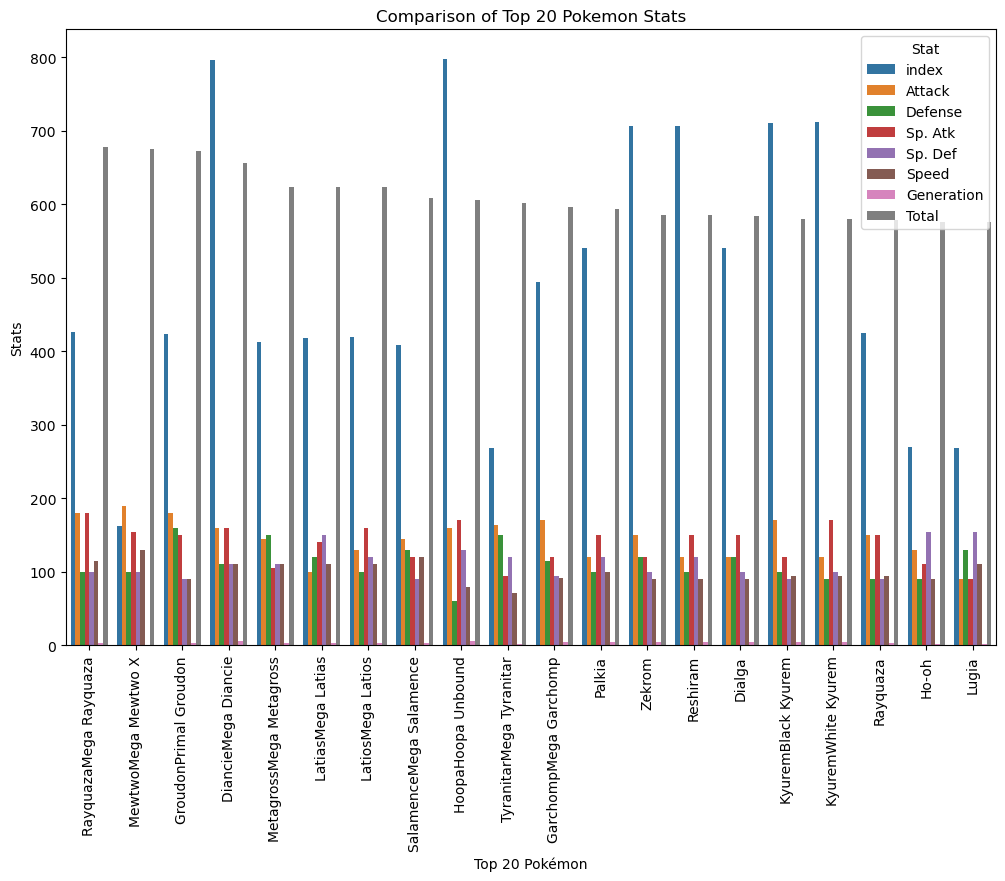

In [648]:
# Set up the figure size
plt.figure(figsize=(12, 8))

# Reshape the data using the melt function
melted_data = top_20_pokemon.reset_index().melt(id_vars=['Name', 'Type 1', 'Type 2'], var_name='Stat', value_name='Value')

# Create a bar graph
sns.barplot(x='Name', y='Value', hue='Stat', data=melted_data)

# Customize the plot
plt.xticks(rotation=90)
plt.xlabel('Top 20 Pokémon')
plt.ylabel('Stats')
plt.title('Comparison of Top 20 Pokemon Stats')

# Show the plot
plt.show()

# LINEAR REGRESSION MODEL #

Coefficients:

Attack     1.873823
Defense    1.150891
dtype: float64


Intercept:

140.11780717705534


For Type: Dragon
1) The model explains, 63.81 % variance from the original
2) The Mean Absolute Error of the model is: 61.61
3) The R-Square score of the model is  0.36


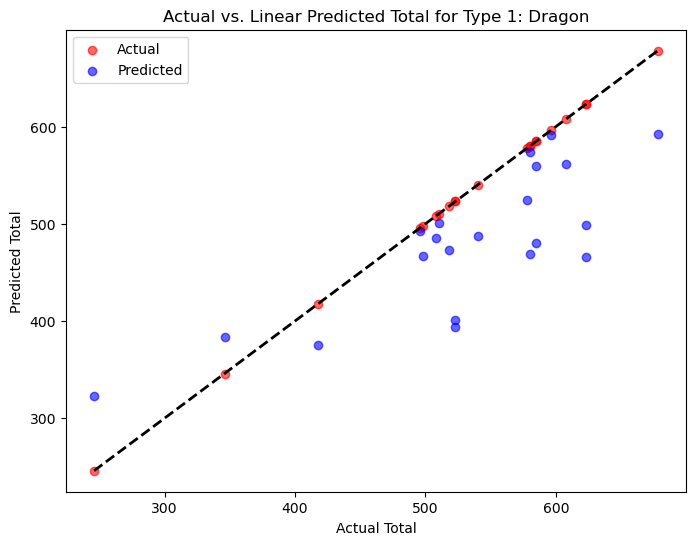

For Type: Psychic
1) The model explains, 82.27 % variance from the original
2) The Mean Absolute Error of the model is: 64.92
3) The R-Square score of the model is  0.63


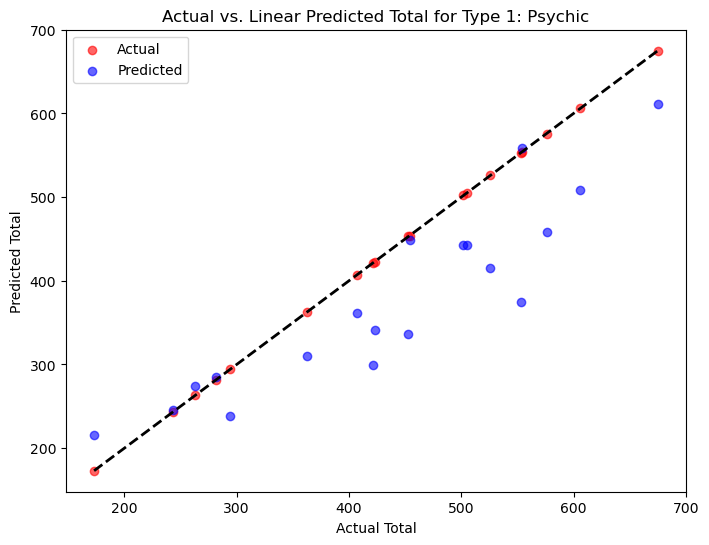

For Type: Ground
1) The model explains, 72.57 % variance from the original
2) The Mean Absolute Error of the model is: 52.82
3) The R-Square score of the model is  0.59


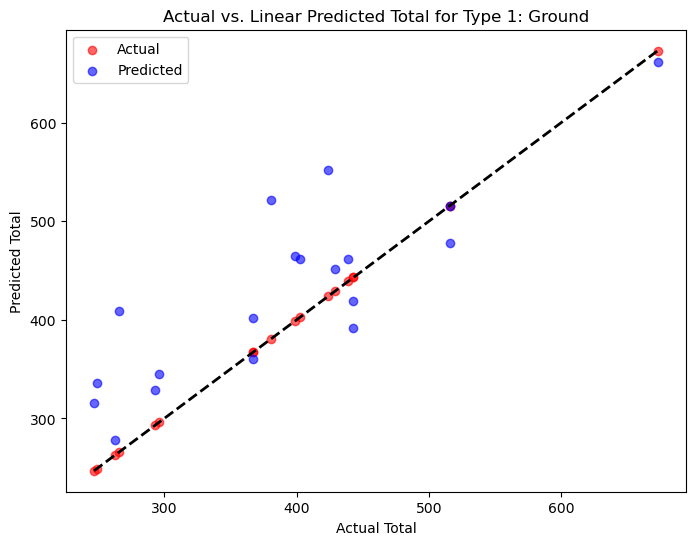

For Type: Rock
1) The model explains, 69.13 % variance from the original
2) The Mean Absolute Error of the model is: 47.58
3) The R-Square score of the model is  0.65


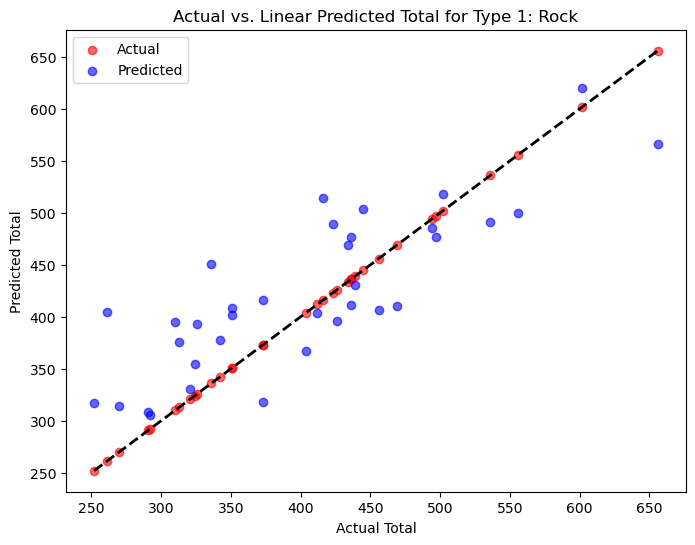

For Type: Steel
1) The model explains, 61.09 % variance from the original
2) The Mean Absolute Error of the model is: 62.17
3) The R-Square score of the model is  0.49


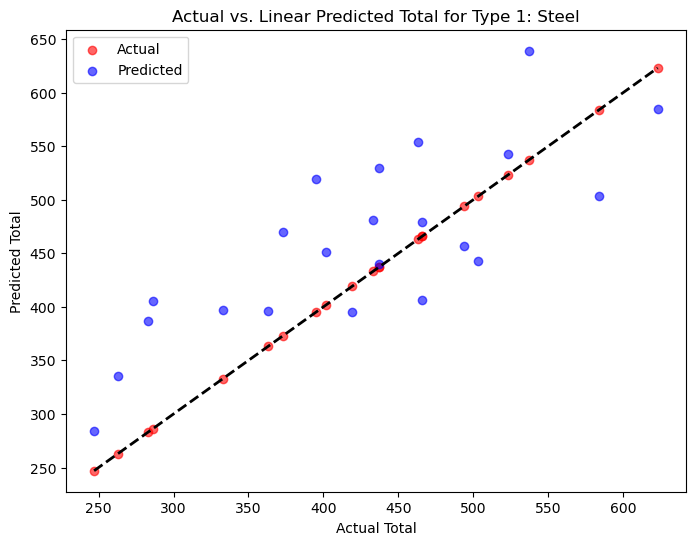

For Type: Water
1) The model explains, 67.35 % variance from the original
2) The Mean Absolute Error of the model is: 42.59
3) The R-Square score of the model is  0.67


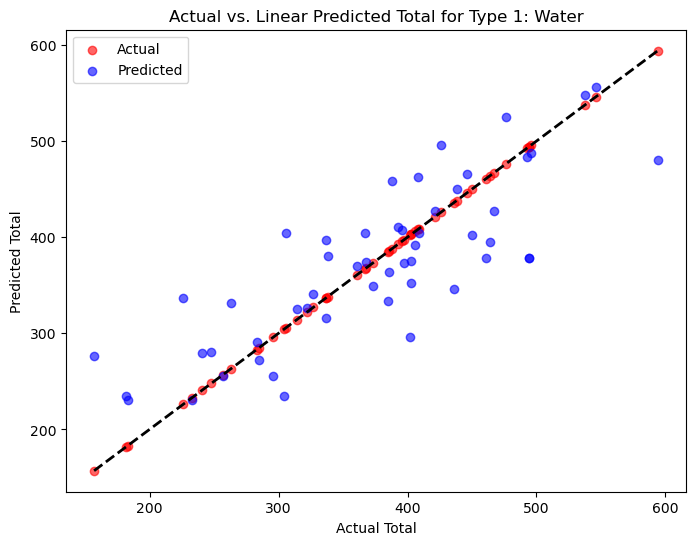

For Type: Fire
1) The model explains, 65.56 % variance from the original
2) The Mean Absolute Error of the model is: 48.46
3) The R-Square score of the model is  0.51


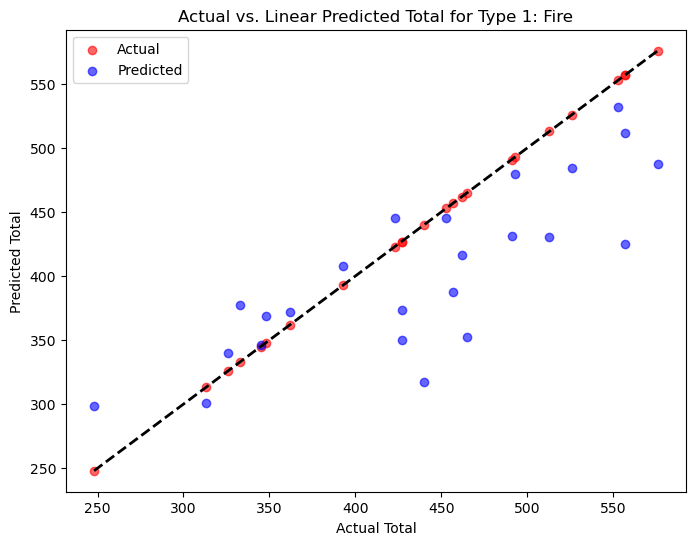

For Type: Grass
1) The model explains, 68.29 % variance from the original
2) The Mean Absolute Error of the model is: 40.7
3) The R-Square score of the model is  0.68


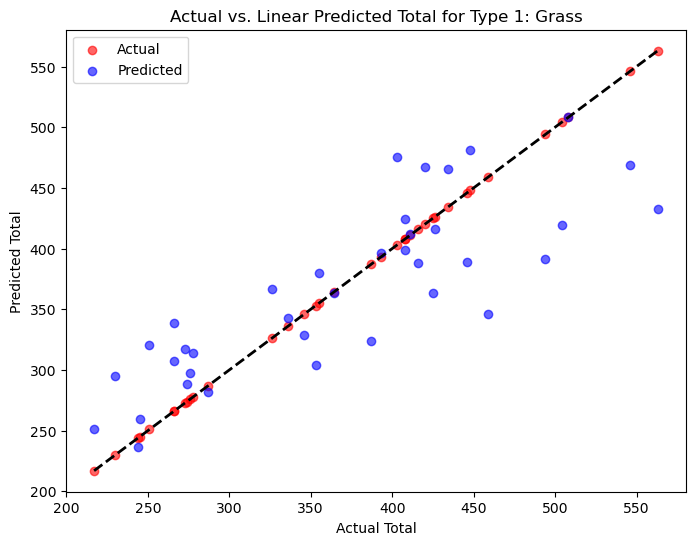

For Type: Dark
1) The model explains, 66.72 % variance from the original
2) The Mean Absolute Error of the model is: 38.85
3) The R-Square score of the model is  0.66


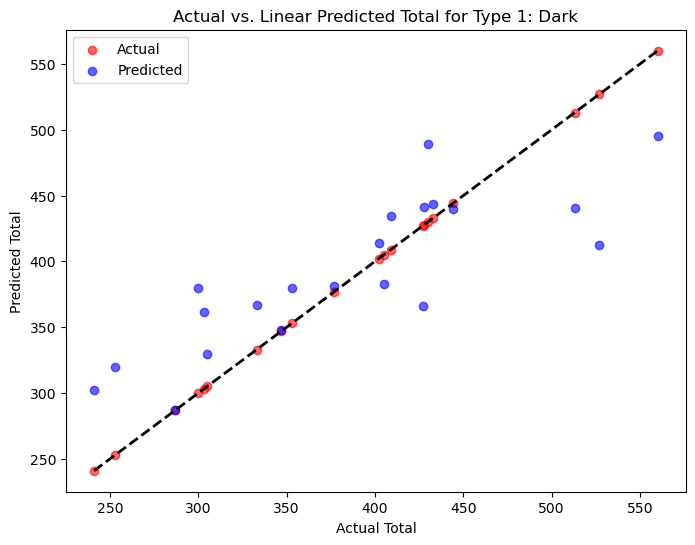

For Type: Fighting
1) The model explains, 85.09 % variance from the original
2) The Mean Absolute Error of the model is: 32.96
3) The R-Square score of the model is  0.84


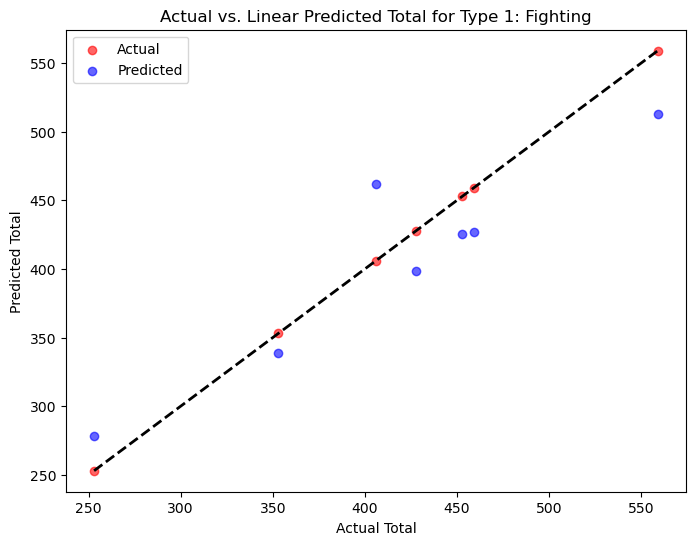

For Type: Ghost
1) The model explains, 50.62 % variance from the original
2) The Mean Absolute Error of the model is: 52.6
3) The R-Square score of the model is  0.49


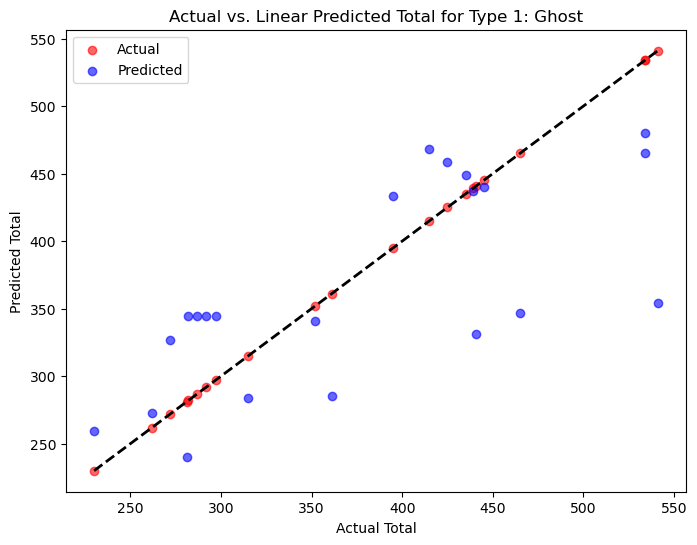

For Type: Bug
1) The model explains, 67.17 % variance from the original
2) The Mean Absolute Error of the model is: 47.76
3) The R-Square score of the model is  0.63


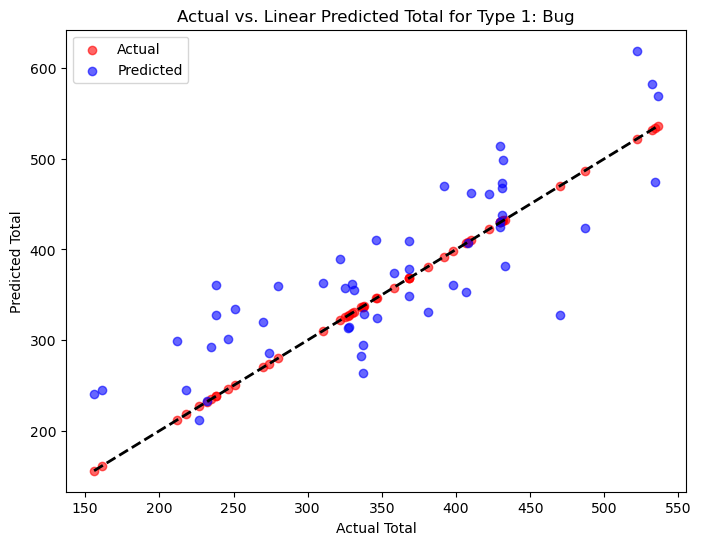

For Type: Electric
1) The model explains, 83.34 % variance from the original
2) The Mean Absolute Error of the model is: 69.64
3) The R-Square score of the model is  -0.07


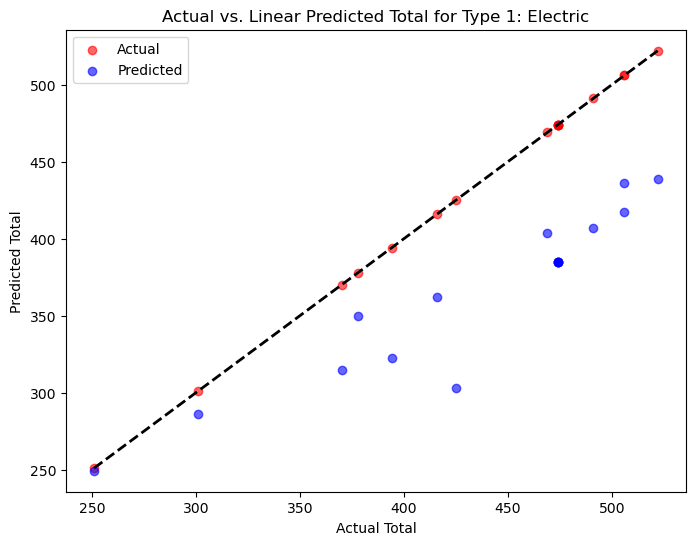

For Type: Normal
1) The model explains, 75.53 % variance from the original
2) The Mean Absolute Error of the model is: 45.58
3) The R-Square score of the model is  0.72


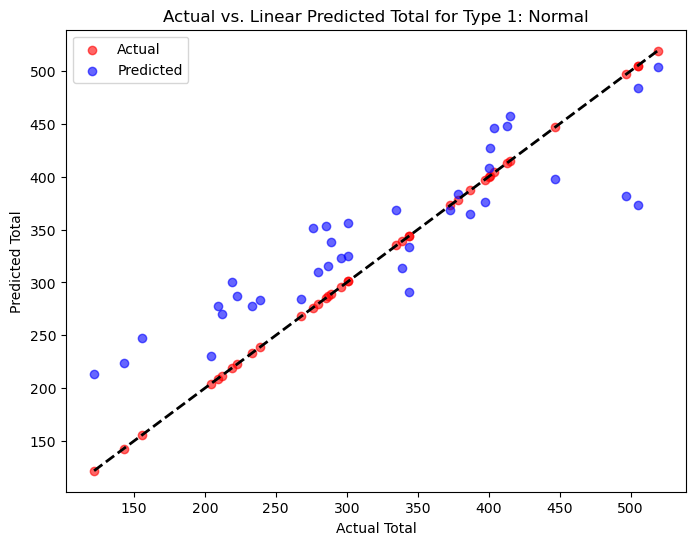

For Type: Ice
1) The model explains, 53.46 % variance from the original
2) The Mean Absolute Error of the model is: 52.69
3) The R-Square score of the model is  0.53


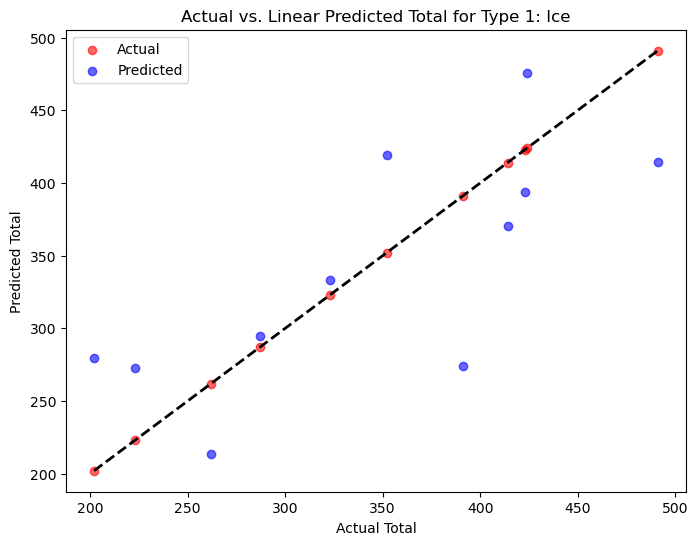

For Type: Fairy
1) The model explains, 46.72 % variance from the original
2) The Mean Absolute Error of the model is: 79.98
3) The R-Square score of the model is  -1.57


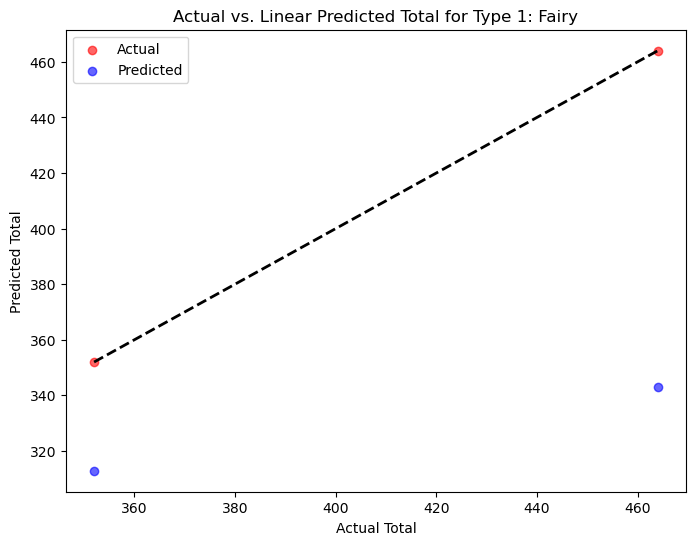

For Type: Flying
1) The model explains, 76.7 % variance from the original
2) The Mean Absolute Error of the model is: 59.13
3) The R-Square score of the model is  0.69


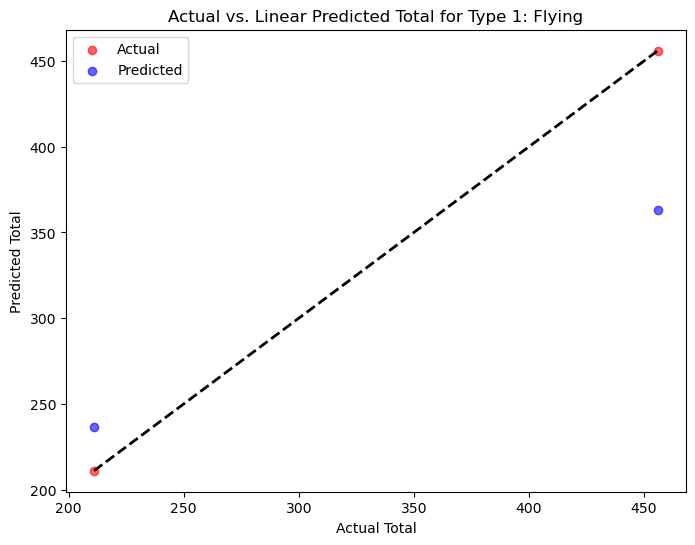

For Type: Poison
1) The model explains, 81.75 % variance from the original
2) The Mean Absolute Error of the model is: 28.51
3) The R-Square score of the model is  0.8


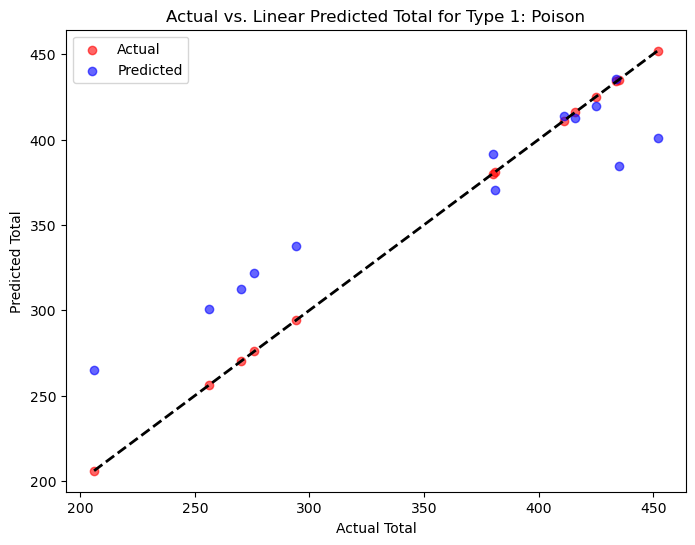

In [649]:
import sklearn.metrics as mt

X = PokeCompare[['Attack', 'Defense']]
y = PokeCompare['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression()
lm.fit(X_train, y_train)

y_predicted = lm.predict(X_test)

coeff = pd.Series(lm.coef_, index=X_train.columns)
intercept = lm.intercept_
print("Coefficients:\n")
print(coeff)
print("\n")
print("Intercept:\n")
print(intercept)
print("\n")

for type_1 in PokeCompare['Type 1'].unique(): #Predicting the Total for the first 5 Type 1's in the dataset
    filtered_data = PokeCompare[PokeCompare['Type 1'] == type_1]
    X_type = filtered_data[['Attack', 'Defense']]
    y_type = filtered_data['Total']
    y_type_predicted = lm.predict(X_type) 

    print(f"For Type: {type_1}")
    print("1) The model explains,", np.round(mt.explained_variance_score(y_type, y_type_predicted) * 100, 2), "% variance from the original")
    print("2) The Mean Absolute Error of the model is:", np.round(mt.mean_absolute_error(y_type, y_type_predicted), 2))
    print("3) The R-Square score of the model is ", np.round(mt.r2_score(y_type, y_type_predicted), 2))

    plt.figure(figsize=(8, 6))
    plt.scatter(y_type, y_type, c='r', label='Actual', alpha=0.6)
    plt.scatter(y_type, y_type_predicted, c='b', label='Predicted', alpha=0.6)
    plt.plot([y_type.min(), y_type.max()], [y_type.min(), y_type.max()], 'k--', lw=2)
    plt.title(f'Actual vs. Linear Predicted Total for Type 1: {type_1}')
    plt.xlabel('Actual Total')
    plt.ylabel('Predicted Total')
    plt.legend(loc='best')
    plt.show()


# SEQUENTIAL MODEL USING TENSORFLOW KERAS LIBARY #

Epoch 1/10
11/11 [==============================] - 0s 7ms/step - loss: 169597.9688 - val_loss: 164694.7500
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 139009.6719 - val_loss: 133222.6094
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 110918.3828 - val_loss: 105606.1484
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 86128.3984 - val_loss: 79664.8281
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 62810.0469 - val_loss: 55213.3320
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 41468.2617 - val_loss: 34157.4688
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 24314.6523 - val_loss: 17967.9824
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 12713.6494 - val_loss: 8521.6777
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 7284.8564 - val_loss: 5025.7476
Epoch 10/10
3/3 [==========================

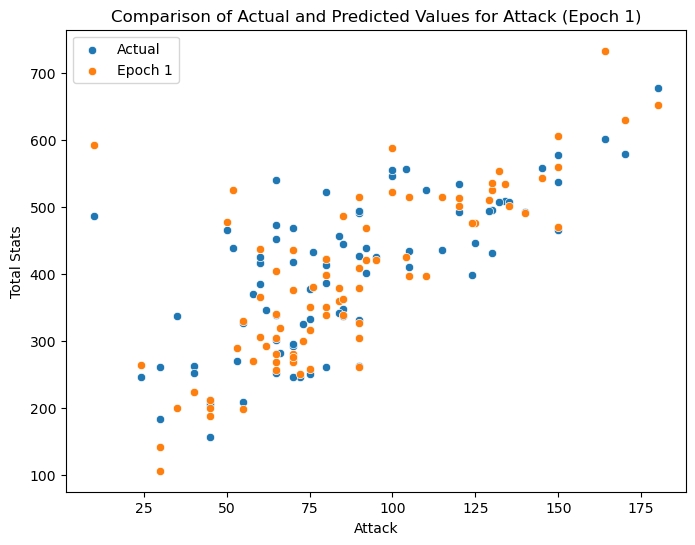

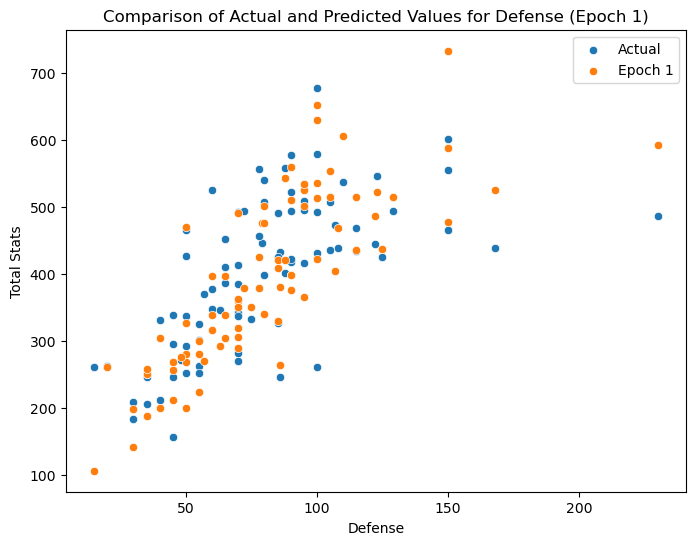

3/3 [==============================] - 0s 1ms/step


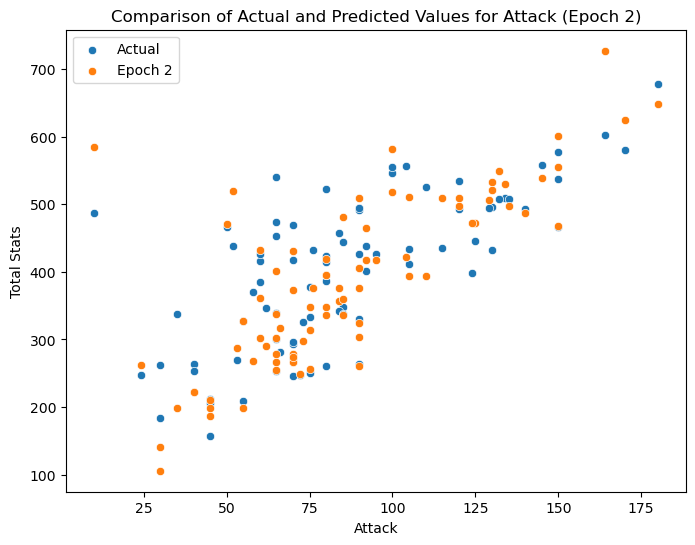

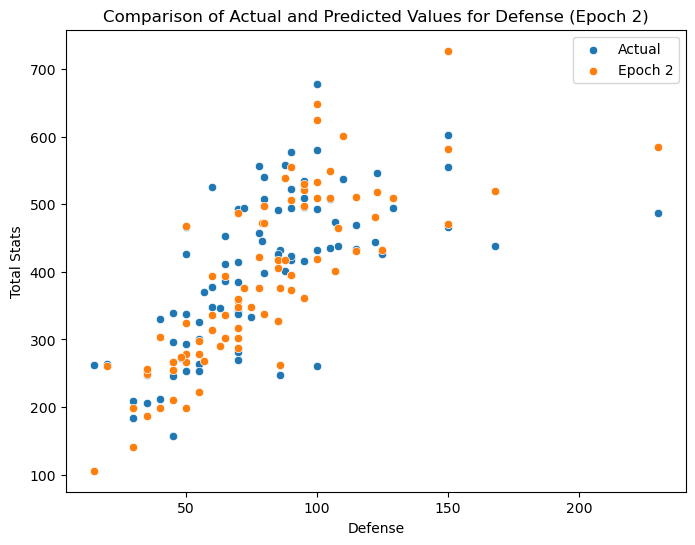

3/3 [==============================] - 0s 777us/step


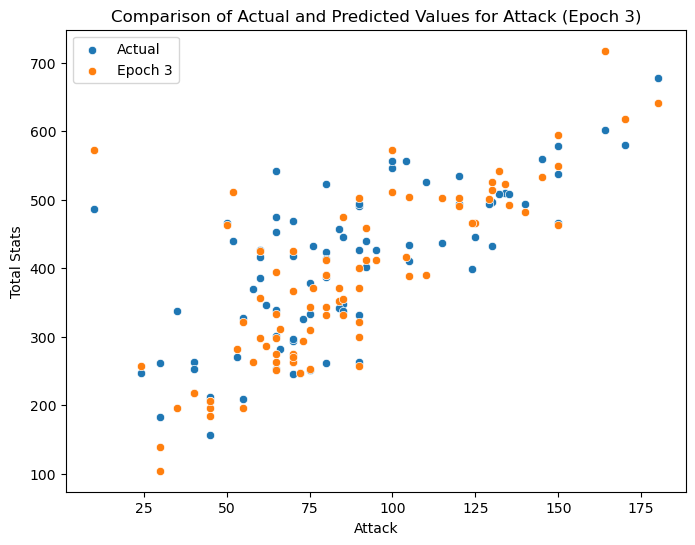

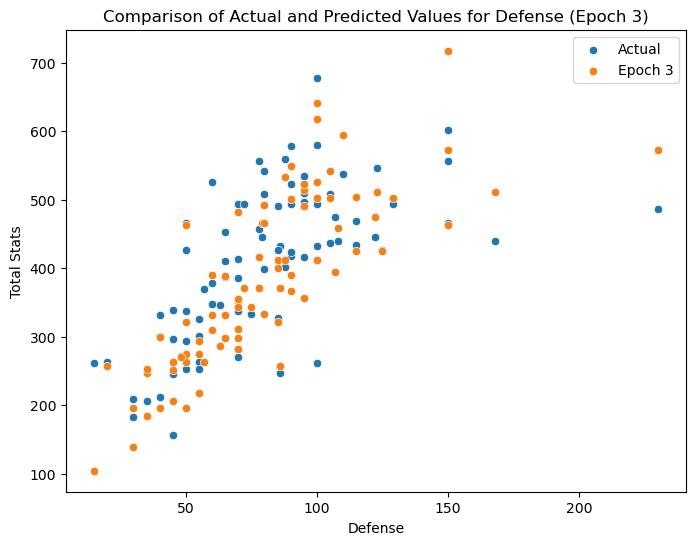

In [650]:
import sklearn.metrics as mt

# Data Preparation
ATK_DEF = CSV.groupby(by=['Type 1'])[['Attack', 'Defense']].sum().reset_index()

X = PokeCompare[['Attack', 'Defense']]
y = PokeCompare['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) 

model.compile(optimizer='adam', loss='mean_squared_error')

# Model Training
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Visualisation Loop
all_predictions = []
for epoch in range(3):
    model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=0) 
    y_pred = model.predict(X_test)
    all_predictions.append(y_pred.ravel())

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_test['Attack'], y=y_test, label='Actual')

    sns.scatterplot(x=X_test['Attack'], y=all_predictions[epoch], label=f'Epoch {epoch + 1}')
    plt.title(f'Comparison of Actual and Predicted Values for Attack (Epoch {epoch + 1})')
    plt.xlabel('Attack')
    plt.ylabel('Total Stats')
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_test['Defense'], y=y_test, label='Actual')
    sns.scatterplot(x=X_test['Defense'], y=all_predictions[epoch], label=f'Epoch {epoch + 1}')
    plt.title(f'Comparison of Actual and Predicted Values for Defense (Epoch {epoch + 1})')
    plt.xlabel('Defense')
    plt.ylabel('Total Stats')
    plt.legend()
    plt.show()


# Decision Tree #

Decision tree classification score: 0.927710843373494
Confusion matrix:
[[74  2]
 [ 4  3]]


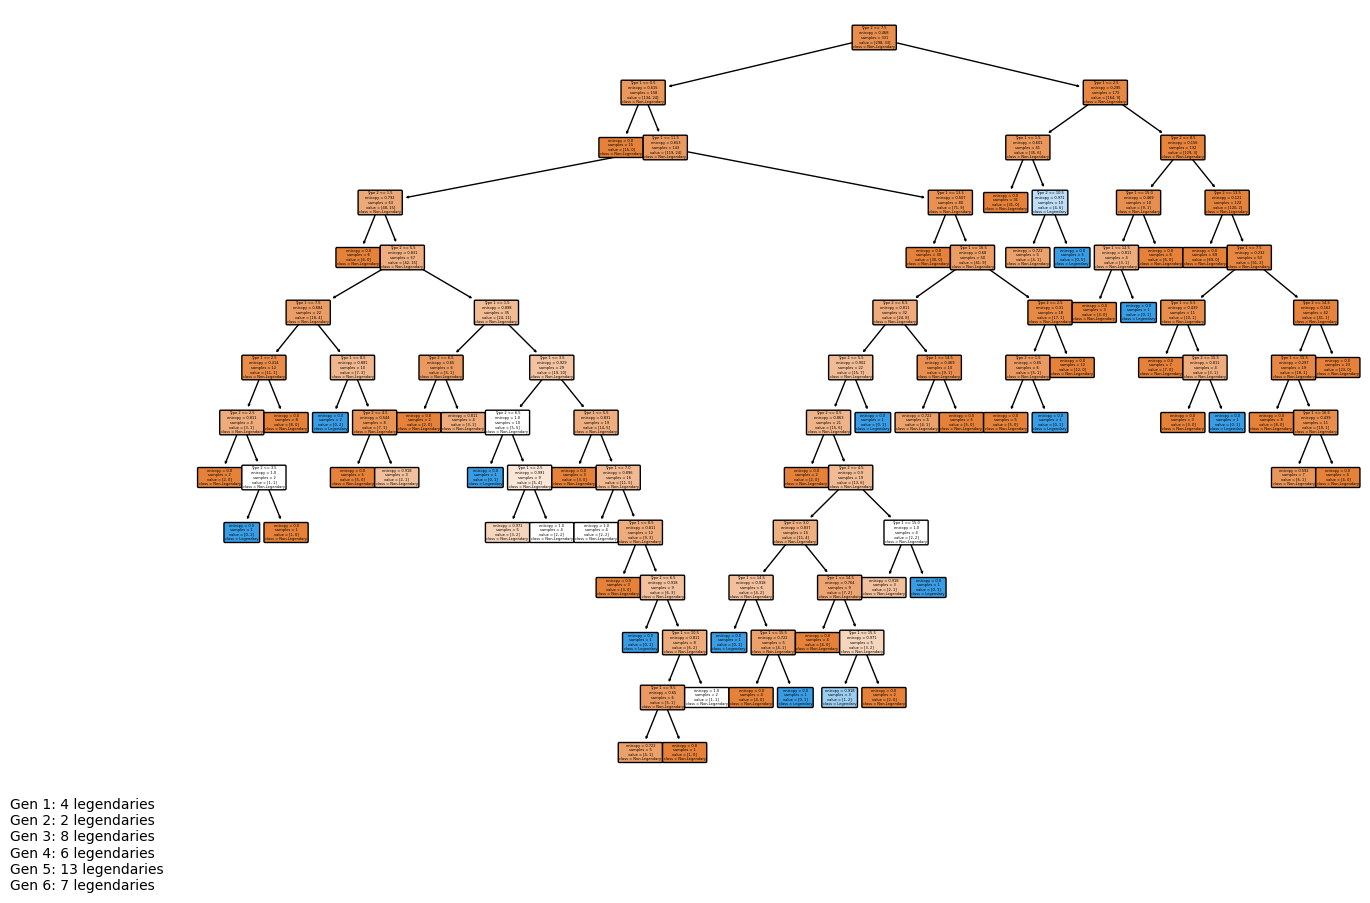

In [651]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

legendary_counts = CSV.groupby('Generation')['Legendary'].sum().reset_index()

label_encoder = LabelEncoder()
CSV['Type 1'] = label_encoder.fit_transform(CSV['Type 1'])
CSV['Type 2'] = label_encoder.transform(CSV['Type 2'])

X = CSV[['Type 1', 'Type 2']]
y = CSV['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

score = clf.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)

print(f"Decision tree classification score: {score}")
print(f"Confusion matrix:\n{cm}")

plt.figure(figsize=(15, 10))
plot = tree.plot_tree(clf, feature_names=X.columns.tolist(), class_names=['Non-Legendary', 'Legendary'], filled=True, rounded=True)
txt = '\n'.join(f"Gen {row['Generation']}: {row['Legendary']} legendaries" for index, row in legendary_counts.iterrows())
plt.text(0, 0, txt, fontsize=10, transform=plt.gcf().transFigure)

plt.show()

